In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
# import math 
import pandas as pd
import os
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Data Loading

Loaded 1584 images.
Sample image shape: (150, 150, 3)
Sample label: finger_1


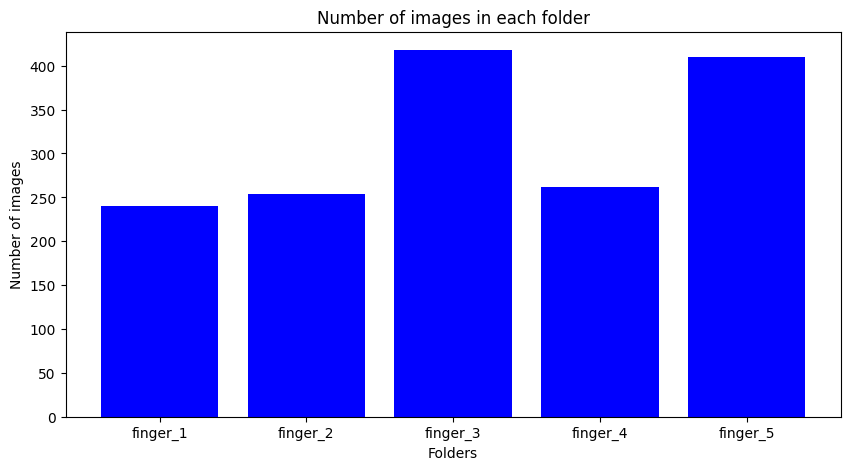

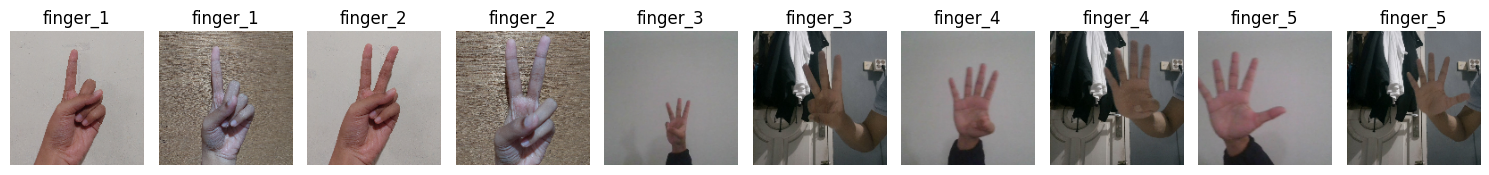

In [109]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def load_and_resize_images_from_folders(folders, target_size=(150, 150), num_images=7):
    images = []
    labels = []
    folder_image_count = {}
    
    for folder_path in folders:
        if not os.path.exists(folder_path):
            print(f"Folder {folder_path} not found.")
            continue
        
        folder_name = os.path.basename(folder_path)
        folder_image_count[folder_name] = 0
        
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
                label = folder_name  # label dari nama folder
                labels.append(label)
                folder_image_count[folder_name] += 1
    
    # Pilih secara acak num_images gambar dari keseluruhan gambar
    if len(images) > num_images:
        images, labels = zip(*random.sample(list(zip(images, labels)), num_images))
    
    return images, labels, folder_image_count

# Folder paths
folder_paths = ['finger_1', 'finger_2', 'finger_3', 'finger_4', 'finger_5']

# Load dan resize gambar
images, labels, folder_image_count = load_and_resize_images_from_folders(folder_paths, num_images=7)

# Cek nomor percobaan
if images:
    print(f"Loaded {len(images)} images.")
    print(f"Sample image shape: {images[0].shape}")
    print(f"Sample label: {labels[0]}")
else:
    print("No images loaded.")


# Plot menampilkan jumlah gambar per folder
plt.figure(figsize=(10, 5))
plt.bar(folder_image_count.keys(), folder_image_count.values(), color='blue')
plt.xlabel('Folders')
plt.ylabel('Number of images')
plt.title('Number of images in each folder')
plt.show()


# Plot menampilkan gambar per folder
plt.figure(figsize=(15, 5))
for i, img in enumerate(images):
    plt.subplot(1, 7, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()



## Data Preparation

### Data Augmentation

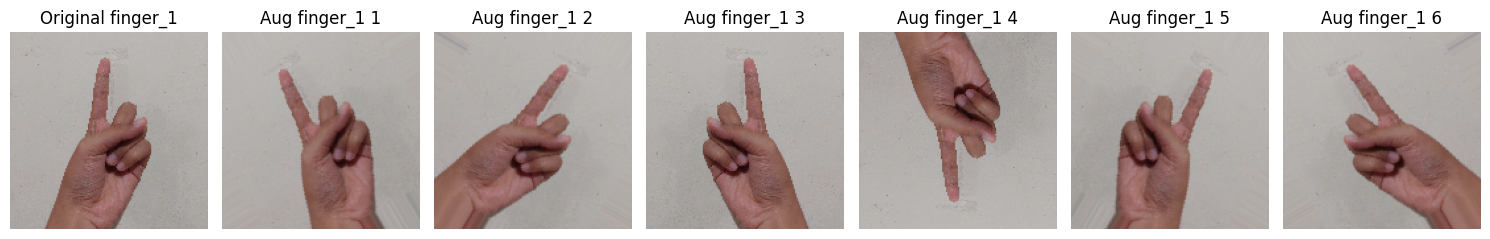

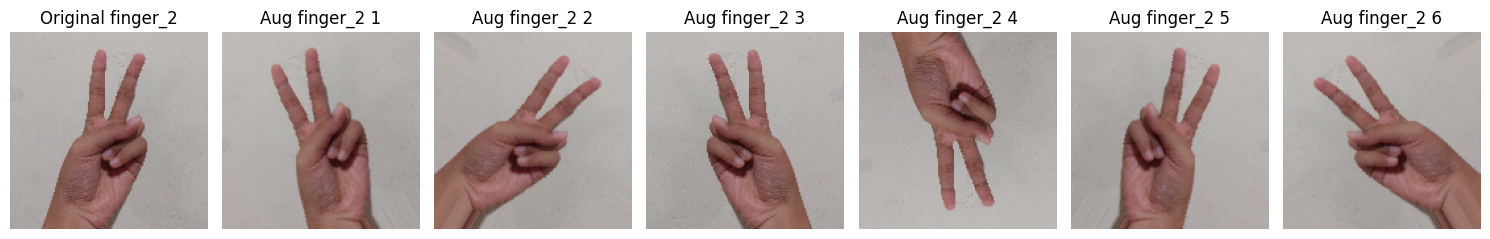

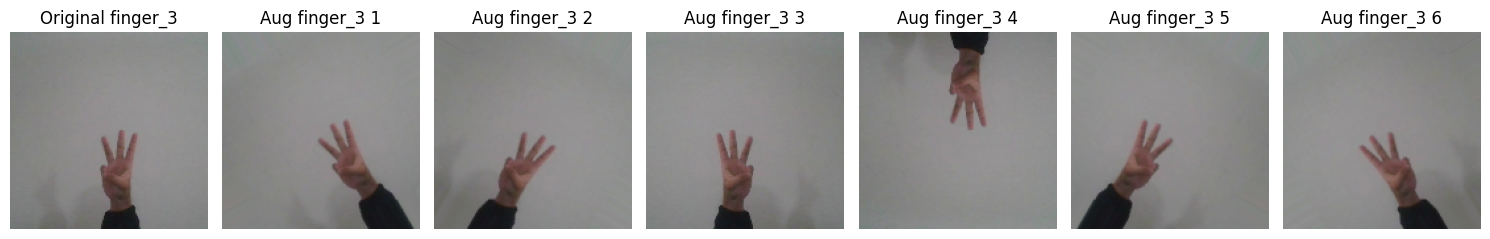

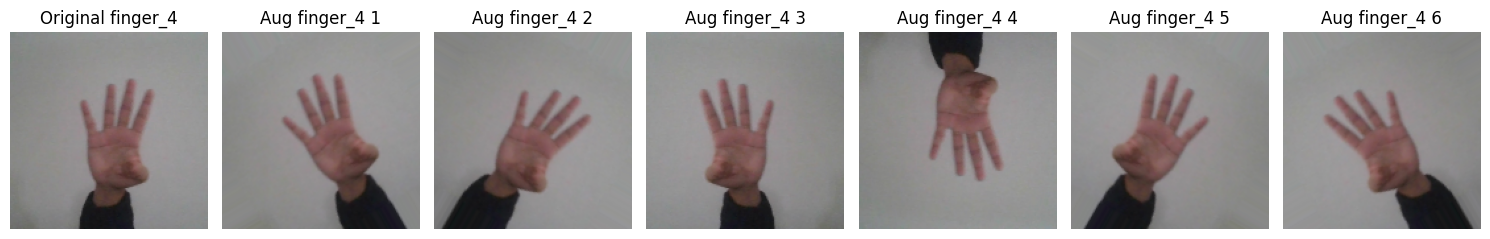

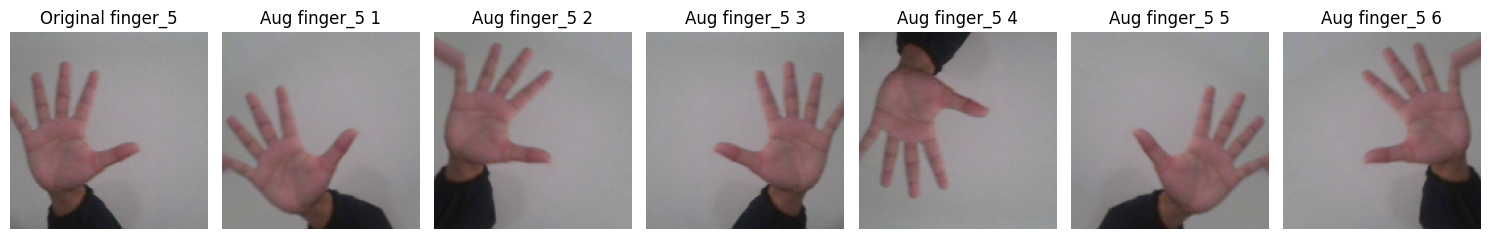

In [110]:
def augmented_image(folder, target_size=(150, 150)):
    augmented_images = []
    augmented_images.append(cv2.resize(folder[0], target_size))  # Original image resized
    
    # Augmentations
    for rotation_angle in [cv2.ROTATE_180, cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]:
        augmented_img = cv2.rotate(folder[0], rotation_angle)
        augmented_images.append(cv2.resize(augmented_img, target_size))
    
    augmented_img_1 = cv2.flip(folder[0], 1)  # Horizontal flip
    augmented_images.append(cv2.resize(augmented_img_1, target_size))
    augmented_img_2 = cv2.flip(folder[0], 0)  # Vertical flip
    augmented_images.append(cv2.resize(augmented_img_2, target_size))
    
    plt.figure(figsize=(20, 5))
    for i, img in enumerate(augmented_images):
        plt.subplot(1, len(augmented_images), i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Augmented Image {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return augmented_images

# Assuming sample_images is returned from the previous function
data1 = augmented_image(sample_images['finger_1'])
data2 = augmented_image(sample_images['finger_2'])
data3 = augmented_image(sample_images['finger_3'])
data4 = augmented_image(sample_images['finger_4'])
data5 = augmented_image(sample_images['finger_5'])


### Preprocessing

#### Preprocessing 1

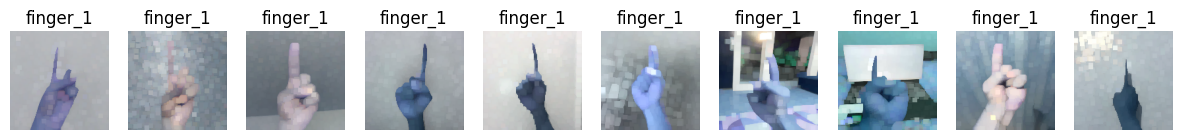

In [112]:
import matplotlib.pyplot as plt

def display_samples(images, labels, num_samples=10):
    num_display = min(num_samples, len(images))  # Pastikan tidak melebihi jumlah gambar yang tersedia
    fig, axes = plt.subplots(1, num_display, figsize=(15, 5))

    for i in range(num_display):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])
        axes[i].axis('off')

    plt.show()

def custom_dilate(images, kernel_size=(5, 5)):
    dilated_images = []
    
    kernel = np.ones(kernel_size, np.uint8)
    
    for img in images:
        if img is None:
            continue  # Lewatkan gambar yang gagal dimuat
        
        # Lakukan operasi dilatasi menggunakan teknik morfologi
        dilated_img = cv2.dilate(img, kernel, iterations=1)
        
        dilated_images.append(dilated_img)
    
    return dilated_images

# Dilatasi gambar dengan bentuk berbeda
dilated_images_custom = custom_dilate(images, kernel_size=(7, 7))  # Misalnya, menggunakan kernel berukuran (7, 7)

# Tampilkan gambar yang sudah didilatasi dengan bentuk berbeda
display_samples(dilated_images_custom, labels, num_samples=10)


#### Preprocessing 2

#### Preprocessing n

### Feature Extraction

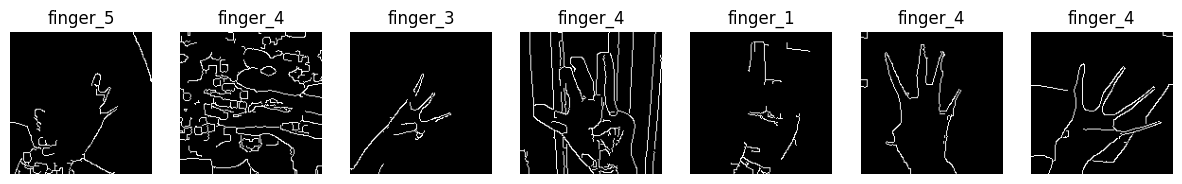

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_detection(images, low_threshold=50, high_threshold=150):
    edge_detected_images = []

    for img in images:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Deteksi tepi menggunakan operator Canny
        edges = cv2.Canny(gray_image, low_threshold, high_threshold)
        
        edge_detected_images.append(edges)
    
    return edge_detected_images

def display_edge_samples(images, labels, num_samples=10):
    num_samples = min(num_samples, len(images))
    label_indices = np.random.choice(len(images), num_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(label_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx], cmap='gray')  # Perubahan: Menggunakan cmap='gray' untuk menampilkan gambar grayscale
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()
dilated_images_custom = custom_dilate(images, kernel_size=(7, 7))  # Misalnya, menggunakan kernel berukuran (7, 7)

# Deteksi tepi pada gambar yang sudah didilatasi
edge_detected_custom_images = edge_detection(dilated_images_custom)

# Tampilkan gambar yang telah diproses dengan deteksi tepi
display_edge_samples(edge_detected_custom_images, labels, num_samples=10)


In [92]:
def contrast(matriks):
    result = 0
    for i in range (matriks.shape[0]):
        for j in range (matriks.shape[1]):
            result += (i,j)**2*matriks[i,j]
    return result        

In [93]:
import numpy as np

# Define your functions here

# Assuming you have your images stored in a list or array called 'data'
data = [...]  # Replace [...] with your actual list or array of images

Degree0 = []
Degree90 = []
Degree45 = []
Degree135 = []
for i in range(len(data)):
    temp0 = derajat0(data[i])
    temp90 = derajat90(data[i])  # Fixed typo: derajat0 should be derajat90
    temp45 = derajat45(data[i])  # Fixed typo: derajat0 should be derajat45
    temp135 = derajat135(data[i])  # Fixed typo: derajat0 should be derajat135
    Degree0.append(temp0)
    Degree90.append(temp90)
    Degree45.append(temp45)
    Degree135.append(temp135)


AttributeError: 'ellipsis' object has no attribute 'shape'

In [88]:
def contrast(matriks):
    result = 0
    for i in range (matriks.shape[0]):
        for j in range (matriks.shape[1]):
            result += (i,j)**2*matriks[i,j]
    return result        

In [102]:
# Fungsi GLCM untuk sudut 0 derajat
def derajat0(img):
    max_val = np.max(img)
    img_tmp = np.zeros([max_val + 1, max_val + 1])
    for i in range(len(img)):
        for j in range(len(img[i]) - 1):
            img_tmp[img[i, j], img[i, j + 1]] += 1

    data = img_tmp + np.transpose(img_tmp)
    tmp = np.sum(data)

    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data

# Fungsi GLCM untuk sudut 45 derajat
def derajat45(img):
    max_val = np.max(img)
    img_tmp = np.zeros([max_val + 1, max_val + 1])
    for i in range(len(img) - 1):
        for j in range(len(img[i]) - 1):
            img_tmp[img[i + 1, j], img[i, j + 1]] += 1

    data = img_tmp + np.transpose(img_tmp)
    tmp = np.sum(data)

    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data

# Fungsi GLCM untuk sudut 90 derajat
def derajat90(img):
    max_val = np.max(img)
    img_tmp = np.zeros([max_val + 1, max_val + 1])
    for i in range(len(img) - 1):
        for j in range(len(img[i])):
            img_tmp[img[i + 1, j], img[i, j]] += 1

    data = img_tmp + np.transpose(img_tmp)
    tmp = np.sum(data)

    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data

# Fungsi GLCM untuk sudut 135 derajat
def derajat135(img):
    max_val = np.max(img)
    img_tmp = np.zeros([max_val + 1, max_val + 1])
    for i in range(len(img) - 1):
        for j in range(len(img[i]) - 1):
            img_tmp[img[i, j], img[i + 1, j + 1]] += 1

    data = img_tmp + np.transpose(img_tmp)
    tmp = np.sum(data)

    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= tmp
    return data


### Features Selection

### Splitting Data

### Normalization

In [ ]:
# def normalisasi(image):
#     min_val = np.min(image)
#     max_val = np.max(image)

#     normalisasi_img = (image -min_val)/(max_val - min_val)
#     uint8_img = (normalisasi_img * 255).astype(np.uint8)

#     return uint8_img


# savePath = "Finger/"
# for i in range (len(data)):
#     norm = normalisasi(data[1])
#     res = cv2.resize(norm, (256,256), interpolation= cv2.INTER_NEAREST)
#     data[i] = res
#     save = savePath + file_name[i] + ".jpg"
#     cv2.imwrite(save, data[i])
    

In [ ]:
# def is_index_valid(arr, i, j):
#     return 0<=i<len(arr) and 0<=j<len(arr[0])

## Modeling

## Evaluation